<a href="https://colab.research.google.com/github/ezdehar1/QoS/blob/main/ImageProcessing_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.io import imread 
import numpy as np
import skimage.color
import skimage.util
import matplotlib.pyplot as plt
import glob
import pandas as pd
import cv2
from sklearn import svm
from sklearn import metrics

#import numpy as np %matplotlib notebook 

In [ ]:
!nvidia-smi

Sun Dec 18 08:52:50 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P0    25W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f1="/content/drive/MyDrive/PHD_service_2nd _Sems/ML/SVM/data3000/train_data"
f2="/content/drive/MyDrive/PHD_service_2nd _Sems/ML/SVM/data3000/test_data"
df1= pd.read_csv(f1, sep=" ",header=None)
df2= pd.read_csv(f2, sep=" ",header=None)
print (df1.shape) 
print (df2)
x_train= df1.iloc[:, :-1]  # input data
y_train= df1.iloc[:, -1]  # output data

x_test = df2.iloc[:, :-1]  # input data
y_test = df2.iloc[:, -1]  # output data



clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:

!git clone https://github.com/ezdehar1/CIFAR-10-images.git

Cloning into 'CIFAR-10-images'...
remote: Enumerating objects: 60144, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 60144 (delta 18), reused 96 (delta 11), pack-reused 60027
Receiving objects: 100% (60144/60144), 19.96 MiB | 43.59 MiB/s, done.
Resolving deltas: 100% (60008/60008), done.
Checking out files: 100% (60086/60086), done.


In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['airplane','automobile']#,'bird','cat','deer','dog']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/CIFAR-10-images/train' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : airplane
loaded category:airplane successfully
loading... category : automobile
loaded category:automobile successfully


In [ ]:
#new code    for RGB
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
histo2=[]
df = pd.DataFrame()
Categories=['airplane','bird'] #,'automobile']#,'bird','cat','deer','dog']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/CIFAR-10-images/My_data/train' 
#path which contains all the categories of images
for c in Categories:
    
    print(f'loading... category : {c}')
    path=os.path.join(datadir,c)
    print(Categories.index(c)) 
    for img in os.listdir(path):
        target_arr.append(Categories.index(c))
        histo2=[]
        print((os.path.join(path,img)))
        img = cv2.imread((os.path.join(path,img)))
        
        for i, col in enumerate(['b', 'g', 'r']):
           hist = cv2.calcHist([img], [i], None, [16], [0, 256])
          
           print(hist.flatten())
           histo2.append(hist.flatten())
        print("------------")
        histo=np.array(histo2)
        histo=histo.flatten()
      
        histo=histo.reshape(1,48)
      
        df=df.append(pd.DataFrame(histo))

target=np.array(target_arr)  
df['Target']=target      
print(df)  
print(df.size)
plt.show()

In [ ]:
#new code. for HSV
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
import cv2
histo2=[]
df = pd.DataFrame()
Categories=['airplane',] #,'automobile']#,'bird','cat','deer','dog']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/CIFAR-10-images/My_data/train' 
#path which contains all the categories of images
for c in Categories:
    
    print(f'loading... category : {c}')
    path=os.path.join(datadir,c)
    print(Categories.index(c)) 
    for img in os.listdir(path):
        target_arr.append(Categories.index(c))
        histo2=[]
        print((os.path.join(path,img)))
        img = cv2.imread((os.path.join(path,img)))
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        for i in [0, 1, 2]:
           hist = cv2.calcHist([img2], [i], None, [16], [0, 16])
           print(hist.flatten())
           histo2.append(hist.flatten())
        print("------------")
        histo=np.array(histo2)
        histo=histo.flatten()
        #print(histo)
        histo=histo.reshape(1,96)
      
        df=df.append(pd.DataFrame(histo))

target=np.array(target_arr)  
df['Target']=target      
print(df)  
print(df.size)
plt.show()

loading... category : airplane
0
/content/CIFAR-10-images/My_data/train/airplane/0009.jpg
[ 8.  0.  1.  2.  0.  3.  9.  4. 13.  6.  7.  9.  2. 17.  5.  8.]
[ 5.  0.  1. 14.  7.  5.  6. 26. 25. 19. 17. 20. 13. 13. 14. 10.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
------------


ValueError: ignored

In [ ]:
images = glob.glob('/content/IMG20221206112748.jpg')
cars = []
notcars = []
for image in images:
    if 'non' in image:
        notcars.append(image)
    else:
        cars.append(image)
cars        

['/content/IMG20221206112748.jpg']

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/IMG20221206112748.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')
plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/IMG20221206112748.jpg')
histo=[]
df = pd.DataFrame()
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [16], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    print(hist.flatten())
    histo.append(hist.flatten())
print("------------")
histo=np.array(histo)
histo=histo.flatten()
histo=histo.reshape(1,48)
d= pd.DataFrame(histo)
df.append(d)
print(d)  
plt.show()

In [ ]:

import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/dog.jpeg')
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")

error: ignored

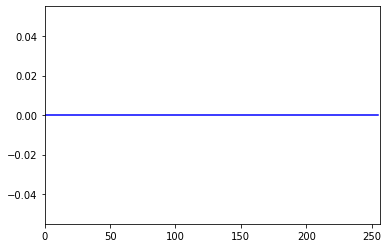

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('/content/IMG20221206112748.jpg')


for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
   
    
plt.show()

In [ ]:
img = cv2.imread('/content/dog.jpg')

img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
plt.plot(hist_h, color='r', label="h")
plt.plot(hist_s, color='g', label="s")
plt.plot(hist_v, color='b', label="v")

error: ignored

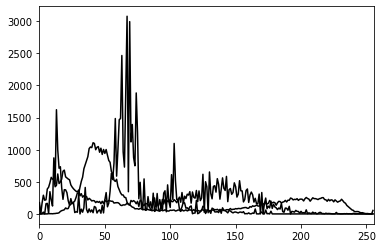

In [ ]:

import matplotlib.pyplot as plt
image = cv2.imread('/content/dog.jpg')
img2 = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

for i in [0, 1, 2]:
    hist = cv2.calcHist([img2], [i], None, [256], [0, 256])
    plt.plot(hist, color = "black")
    plt.xlim([0, 256])
   
    
plt.show()



In [ ]:
    img = cv2.imread('/content/IMG20221206112748.jpg')
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[16],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[16],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[16],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    plt.show()
    print(hist_b)
    print(hist_b.size)
    a=np.hstack((hist_b, hist_g, hist_r))
    a2=a.reshape(1,48)
    d=pd.DataFrame(a2)
    print(a)
    print(a2)
    print(d)

TypeError: ignored

In [ ]:
x=[3,4,5]
x[0:-1]

[3, 4]

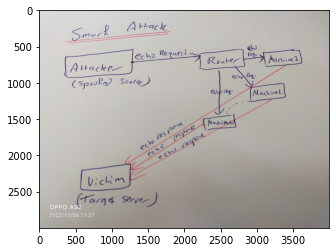

In [ ]:
image = skimage.io.imread("/content/IMG20221206112748.jpg")

# convert the image to float dtype with a value range from 0 to 1
image = skimage.util.img_as_float(image)

# display the image
fig, ax = plt.subplots()
plt.imshow(image, cmap="gray")

Text(0, 0.5, 'Pixel count')

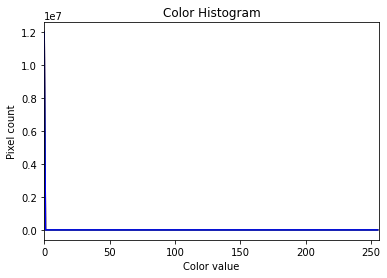

In [ ]:
colors = ("red", "green", "blue")

# create the histogram plot, with three lines, one for
# each color
plt.figure()

plt.xlim([0, 256])
for channel_id, color in enumerate(colors):
    histogram, bin_edges = np.histogram(        image[:, :, channel_id], bins=256, range=(0, 256) )
    plt.plot(bin_edges[0:-1], histogram, color=color)
  
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")
    

In [ ]:
def color_hist(input_image, nbins=32):
    ch1 = np.histogram(input_image[:,:,0], bins = nbins, range = (0, 256))[0] # [0] is because we need only the histogram, not bins edges
    ch2 = np.histogram(input_image[:,:,1], bins = nbins, range = (0, 256))[0]
    ch3 = np.histogram(input_image[:,:,2], bins = nbins, range = (0, 256))[0]
    return np.hstack((ch1, ch2, ch3))